<h1>光頭傑夫製作</h1><img src="https://rolqiw.bl.files.1drv.com/y4mYqkObWmQmdJFd8pab8t8m7d_mFhh3_YG63fiAnPaG6gjahHFt0n087pF97x1W2wemm7hd4ZdiPD2OxoPtqcCD_4-Jy-fojnt97kGGWR4Hnq0-9Ny61afd7WVHVTmF_9pcr45OFDFSwLKByeQU1q9TjwKk-HsNmWVsW1eGQ4Gi-9G4pQ5DYoTxswYJ5r5dLF-kKsA1InEyrqmV3kF5pm4WQ?width=658&height=584&cropmode=none" style='width:160px;margin:0'/>

<!--#1800568843-->

## <span style="color:red ">Seaborn
### * 一個建立在Matplotlib上面的工具
### * 可以輕易的和Pandas結合互動
### * 有很多的風格主題和顏色組合，讓你輕易畫出專業圖表    

## <span style="color:red ">起手測試一下

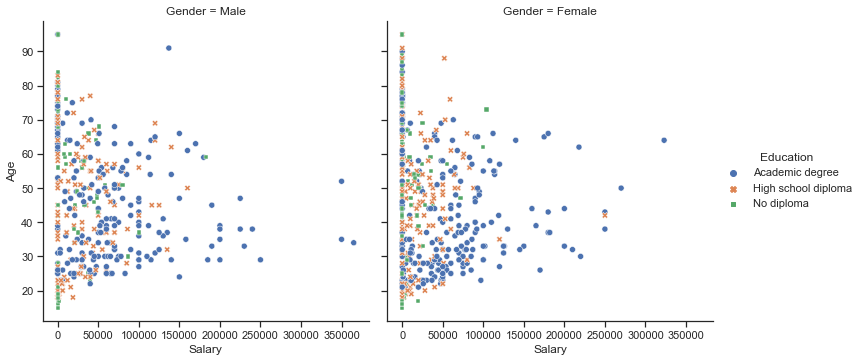

In [1]:
import seaborn as sns
import pandas as pd

#五種風格: darkgrid , whitegrid , dark , white , and ticks
sns.set(style="ticks")
data = pd.read_csv("salary.csv")[:1000]
#relplot=>relationship plot
sns.relplot(data=data,x="Salary", y="Age", hue="Education",style="Education", col="Gender")
#hue 直翻叫做色調，簡單的說就是你要用哪個欄位區分catagory，進而決定點的外觀怎麼畫啦!!
#col 分兩欄畫圖

In [2]:
data

,Unnamed: 0,District,Salary,Age,English,Education,Gender
0,0,Brooklyn,120000.0,31,Only language,Academic degree,Male
1,1,Brooklyn,45000.0,28,Only language,Academic degree,Female
2,2,Manhatten,85000.0,54,Only language,Academic degree,Male
3,3,Manhatten,12000.0,45,Only language,High school diploma,Female
4,4,Brooklyn,0.0,75,Very well,Academic degree,Female
...,...,...,...,...,...,...,...
995,995,Queens,21000.0,42,Not well,Academic degree,Male
996,996,Queens,0.0,40,Not at all,High school diploma,Female
997,997,Queens,0.0,16,Not at all,No diploma,Female
998,998,Staten Island,0.0,70,Very well,Academic degree,Female


## <span style="color:red ">你會發現，我們只要把資料集裡面的變數名稱帶進來，就可以動了耶!!
    完全不用像Matplotlib裡面要設計色輪(color wheel)  
    但是如果你要調整Seaborn很細節的東西，還是要靠Matplotlib。
    

## <span style="color:red ">Seaborn的設計概念就是希望"類似的function完成類似的任務"
----
### [看看Distribution plots有什麼選擇](https://seaborn.pydata.org/api.html#distribution-api)

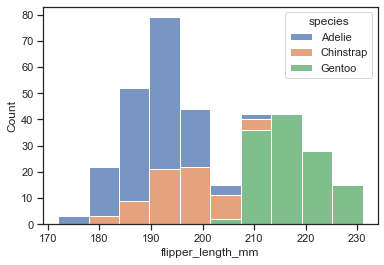

In [5]:
import seaborn as sns
#這是一個跟企鵝有關的dataset
#flipper_length=>腳蹼長度
penguins = sns.load_dataset("penguins")

sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

## [KDE核密度估計是什麼??](https://chaima.pixnet.net/blog/post/224125704-%E3%80%8A%E6%95%B8%E6%93%9A%E5%88%86%E6%9E%90%E3%80%8B%E3%80%90%E5%B0%88%E6%9C%89%E5%90%8D%E8%A9%9E%E3%80%91%E6%A0%B8%E5%AF%86%E5%BA%A6%E4%BC%B0%E8%A8%88%28kernel-d)

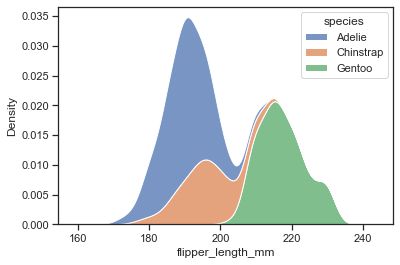

In [6]:
#跟上面的語法完全一樣，換個圖的畫法而已!
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

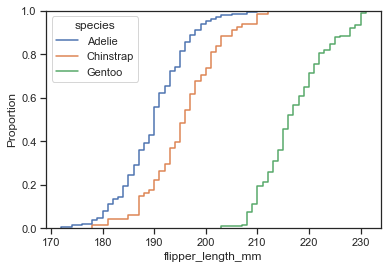

In [7]:
#跟上面的語法幾乎差不多，換個圖的畫法而已!
sns.ecdfplot(data=penguins, x="flipper_length_mm", hue="species")

## <span style="color:red ">Figure-level functions vs. axes-level functions
----
### 還記得Matplotlib裡面的Figure和Axes嗎?
### axes-level functions 就是針對 Axes 的範圍去畫圖，前面提到的方法都是axes-level functions
### Figure-level functions是針對整個Figure的範圍去畫圖 
----
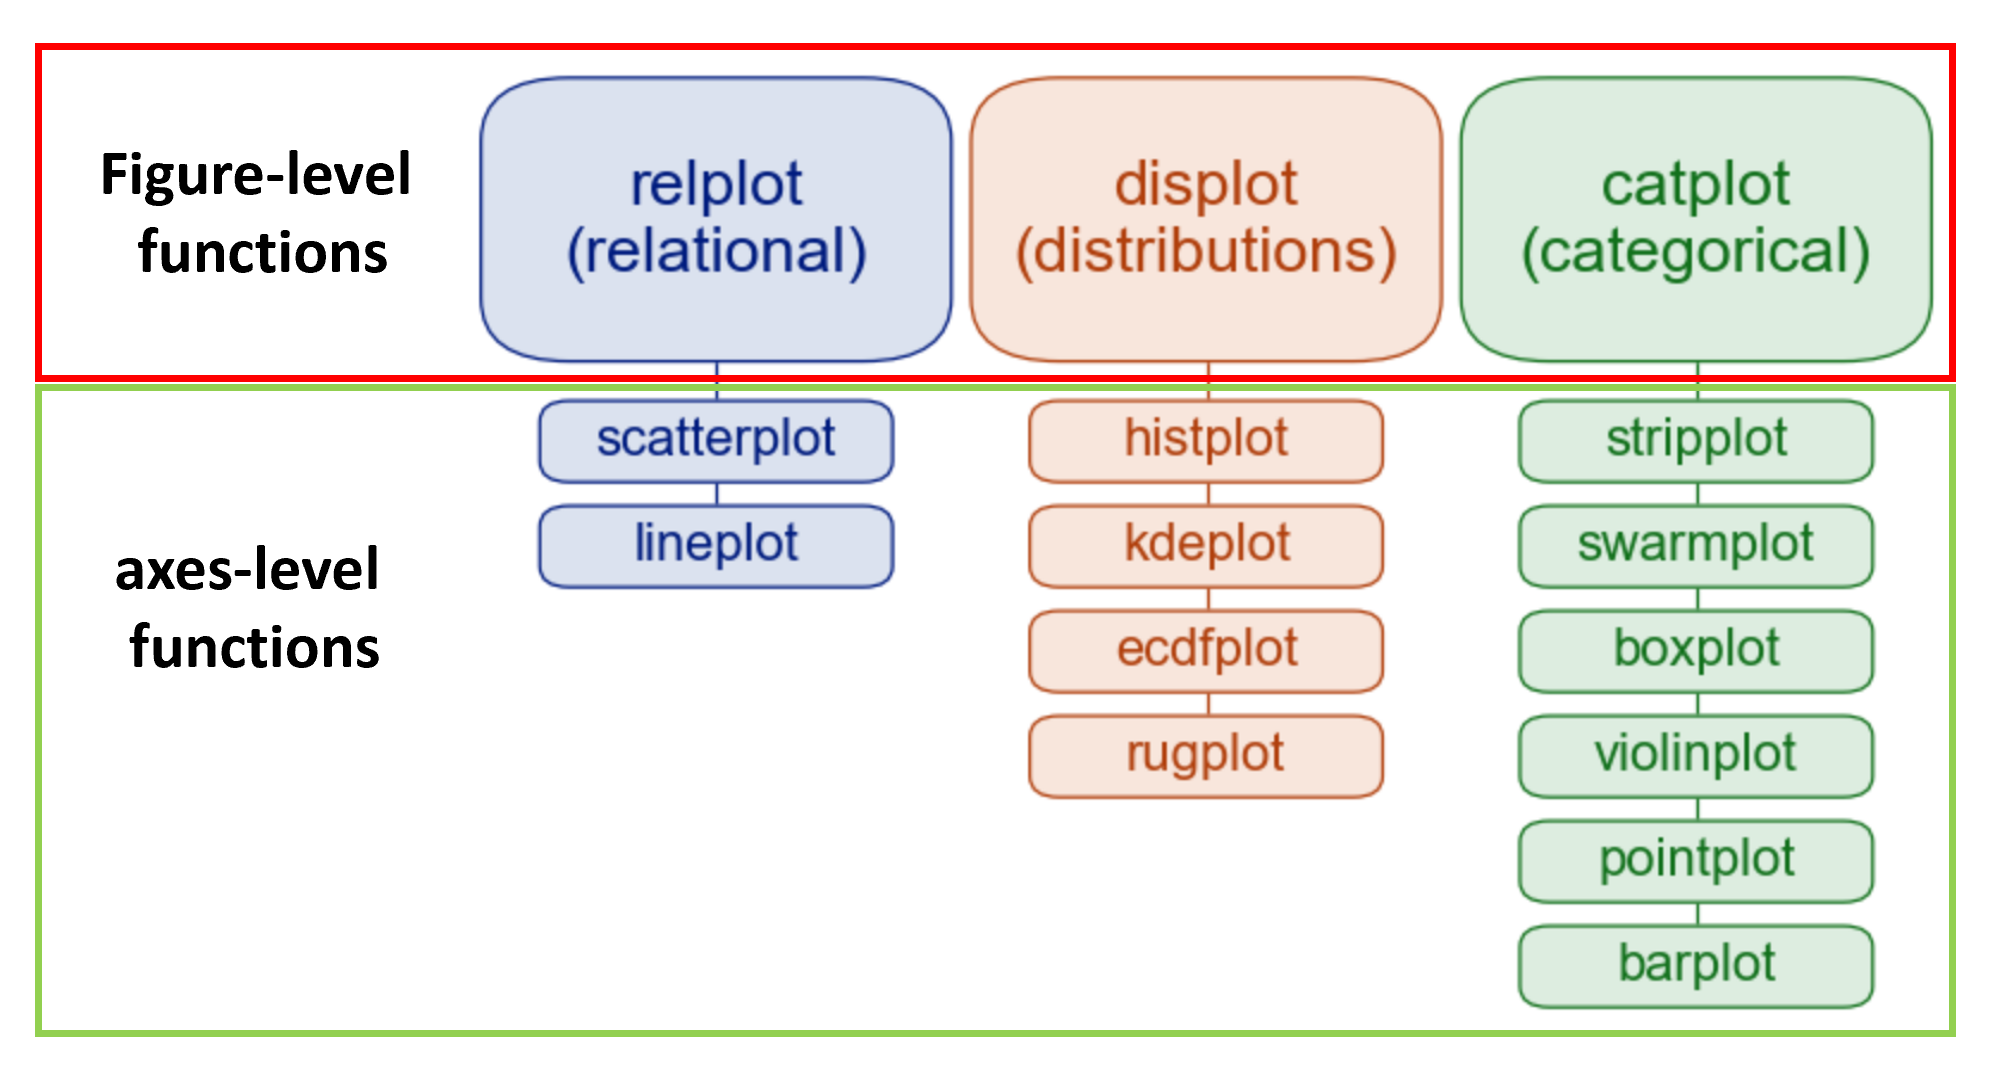

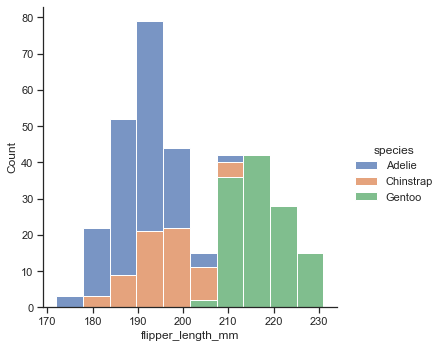

In [8]:
#下面這個就是Figure-level functions
#displot不做設定，預設是 histplot
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

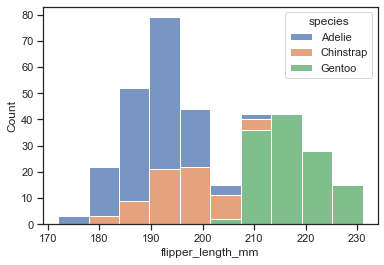

In [9]:
#跟上面的Figure-level functions比較一下，其實還是不太一樣
#legend位置，圖的一些細節...
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

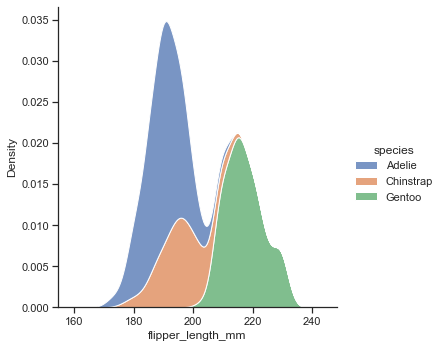

In [10]:
#Figure-level functions可以透過kind設定圖的類型
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde")

### <span style="color:red ">為什麼我們需要Figure-level functions?

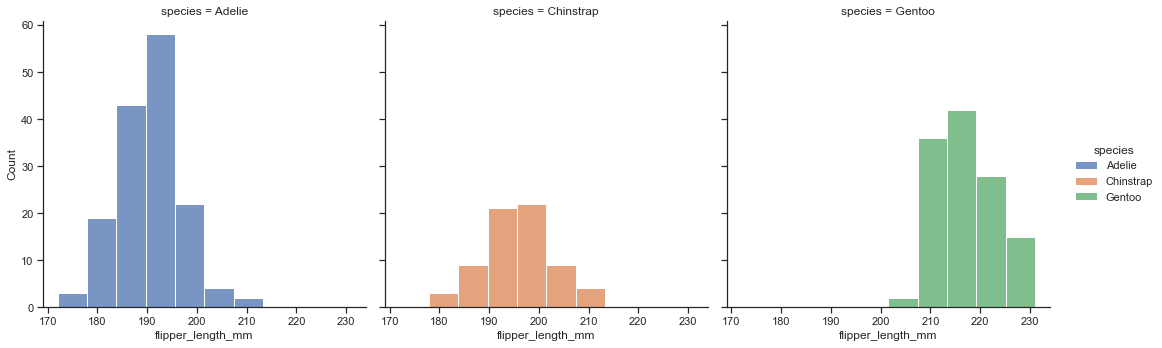

In [11]:
#Figure-level functions是針對整個figure畫圖，所以它一次可以畫很多圖
#你可以把不同類別分欄位畫，就不會遮在一起 =>col參數的魅力
#優點可以簡單畫圖
#缺點你很難對每個圖做細節操控
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")

### <span style="color:red ">但是...不要以為Axes-level functions就不能處理多圖...

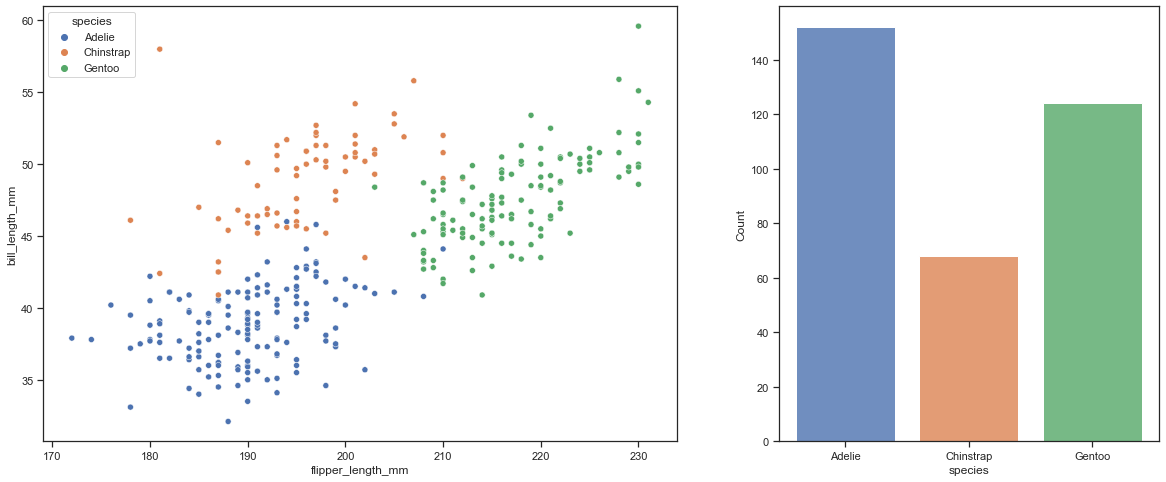

In [12]:
import matplotlib.pyplot as plt
#簡單而言，你要把洞挖好，請每一個Axes-level function自己就定位
f, axs = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw=dict(width_ratios=[5, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])


## <span style="color:red ">雙變數關係圖
-----
   把單一變數和倆倆變數的關係一次呈現

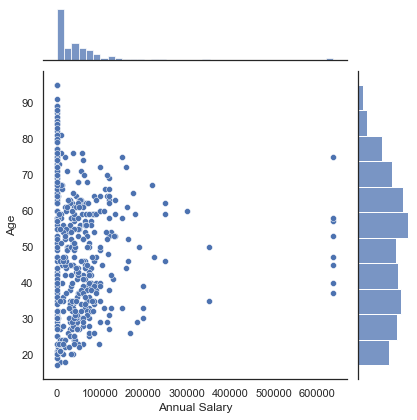

In [13]:
import pandas as pd
import seaborn as sns
data = pd.read_csv('age_salary_hours.csv')
sns.set(style="white")
sns.jointplot(x="Annual Salary", y="Age", data=data)

## <span style="color:red ">多變數關係圖
------
    把所有變數，兩兩一組，畫出所有關係

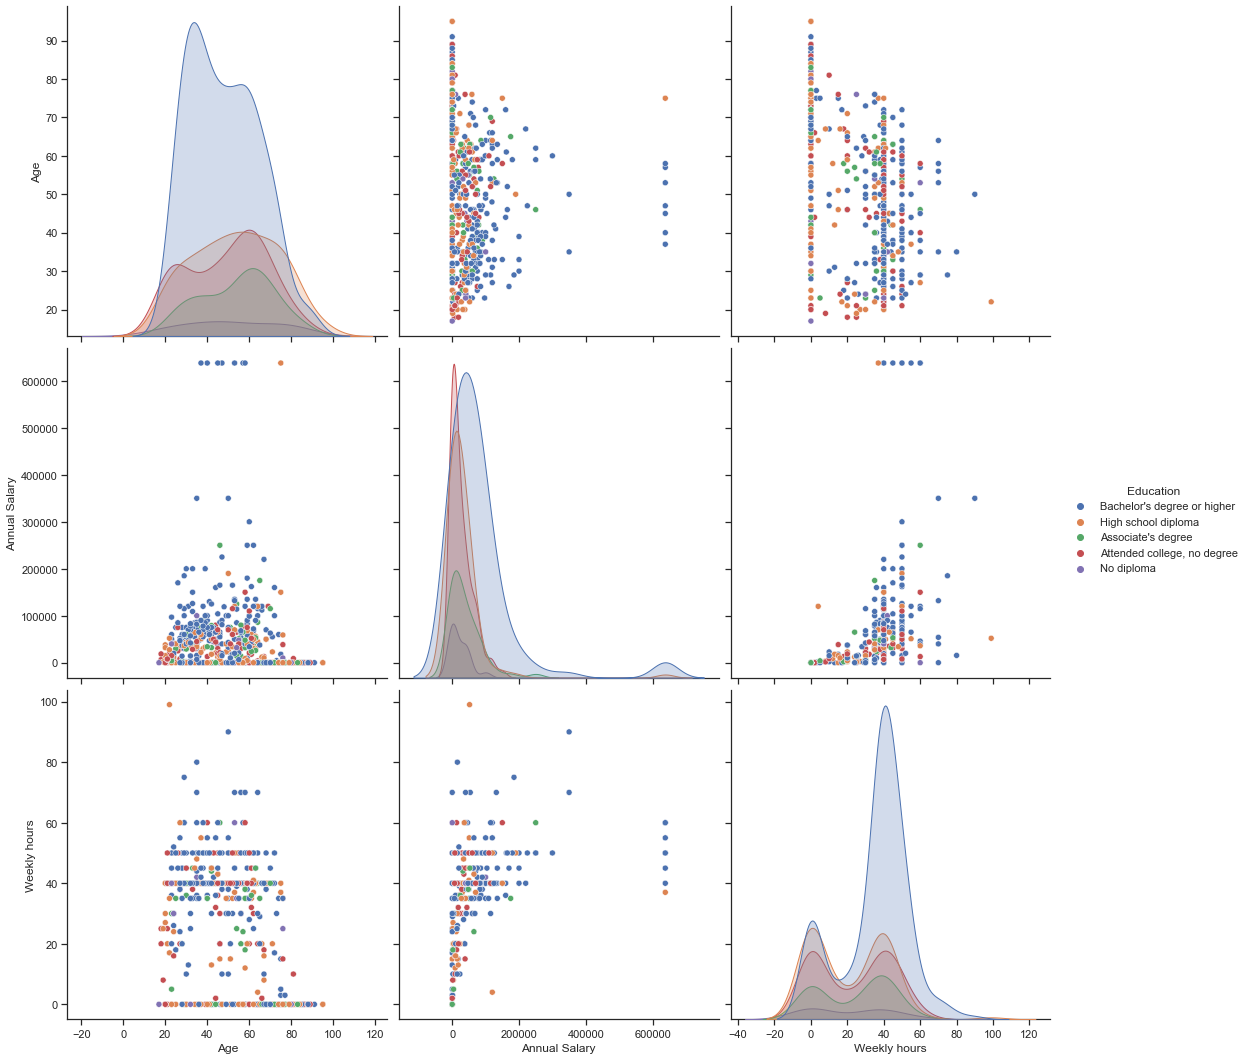

In [14]:
import pandas as pd
import seaborn as sns

data = pd.read_csv('age_salary_hours.csv')
sns.set(style="ticks")

#hue有設定，對角線預設顯示KDE
sns.pairplot(data,hue='Education',height=5)
#你可以強制調整對角線要顯示的圖
#sns.pairplot(data, hue='Education',height=5,diag_kind="hist")

## <span style="color:red ">多圖呈現-Multi-Plots in Seaborn

## <span style="color:red ">FacetGrid的應用

## <span style="color:red ">隔間用seaborn.FacetGrid
    seaborn.FacetGrid(data, row, col, hue, …)
    1. data:你要送進來的DataFrame
    2. row, col:分別代表列和欄   
       hue: 這個代表第三軸位

## <span style="color:red ">畫圖用FacetGrid.map
    FacetGrid.map(func, *args, **kwargs)

In [15]:
import seaborn as sns
#tips是一個關於吃飯付小費的dataset
#sns自己內建這個dataset，所以直接導進來
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


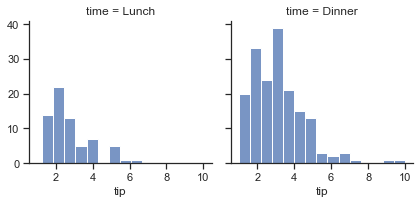

In [16]:
#用time分col
g = sns.FacetGrid(tips, col="time")
#只給一個變數，那就是x軸位
g.map(sns.histplot, "tip")
#目前給出的就是小費的統計分布圖

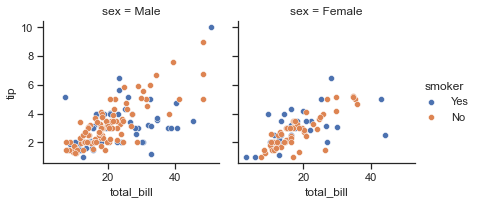

In [19]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
#alpha是透明度
g.map(sns.scatterplot, "total_bill", "tip", alpha=1)
g.add_legend()

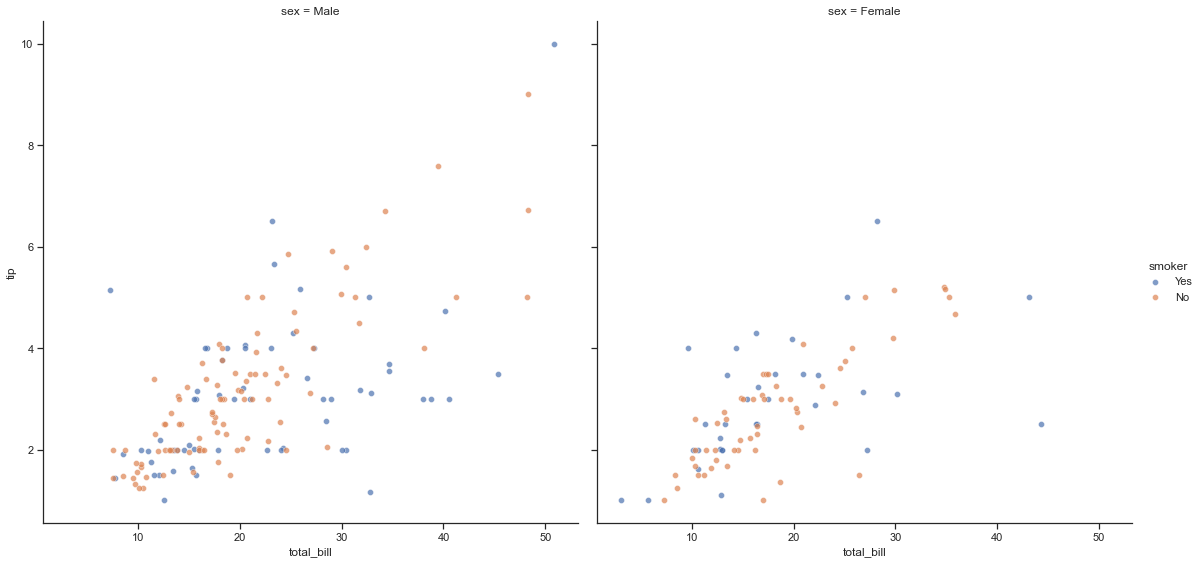

In [20]:
#如果覺得圖太小，可以調整height=8
g = sns.FacetGrid(tips, col="sex", hue="smoker",height=8)
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend()

## <span style="color:red ">還記得前面的pairplot嗎?多提一個PairGrid
----
    PairGrid可以給你更多調整的可能性
### [參考連結](https://seaborn.pydata.org/tutorial/axis_grids.html)  

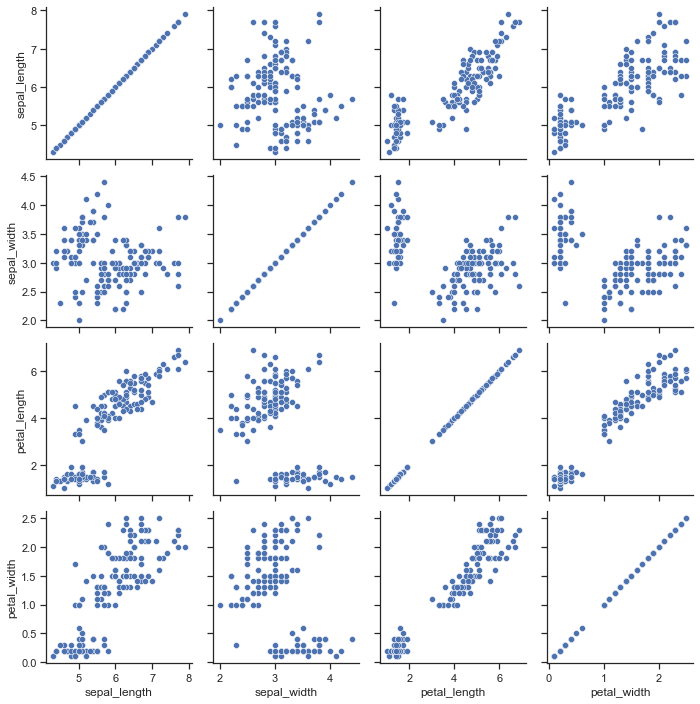

In [21]:
#鳶尾花資料集
iris = sns.load_dataset("iris")
#開始畫圖
g = sns.PairGrid(iris)
g.map(sns.scatterplot)

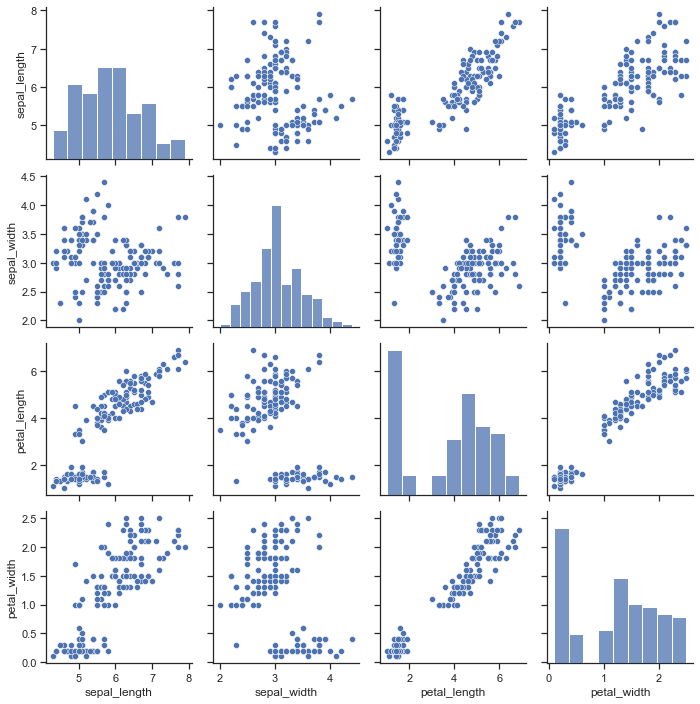

In [22]:
g = sns.PairGrid(iris)
#你可以決定對角和非對角的圖形類別
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [ ]:
g = sns.PairGrid(iris)
#還可以分三塊來設計
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

In [ ]:
#也可以決定你要研究的變數
#調整大小用height=8
g = sns.PairGrid(iris, vars=["sepal_length", "sepal_width"], hue="species")
g.map(sns.scatterplot)

### <span style="color:red "><小測驗>資料夾裡面有一個YouTube.csv，畫一下Youtube前30名的分布
----
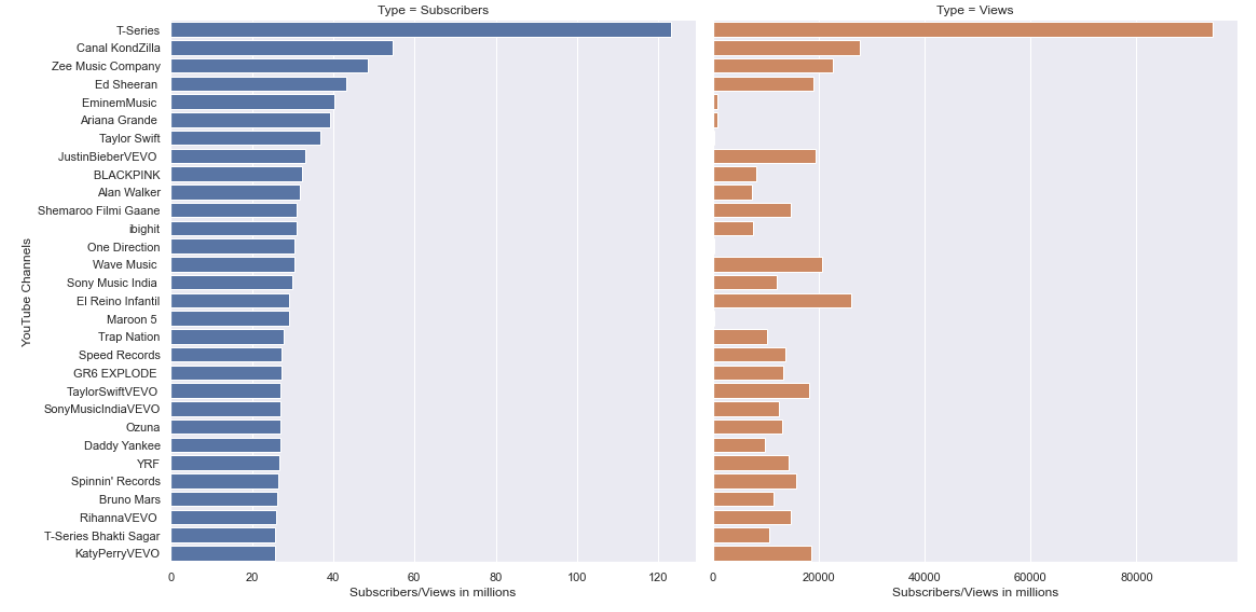

### <span style="color:red "><答案>

In [23]:
data = pd.read_csv("YouTube.csv")
data

,Unnamed: 0,YouTube Channels,Subscribers/Views in millions,Type
0,0,T-Series,123.0,Subscribers
1,1,Canal KondZilla,54.5,Subscribers
2,2,Zee Music Company,48.5,Subscribers
3,3,Ed Sheeran,43.2,Subscribers
4,4,EminemMusic,40.2,Subscribers
5,5,Ariana Grande,39.3,Subscribers
6,6,Taylor Swift,36.8,Subscribers
7,7,JustinBieberVEVO,33.1,Subscribers
8,8,BLACKPINK,32.4,Subscribers
9,9,Alan Walker,31.7,Subscribers


In [24]:
data['YouTube Channels'].unique()

array(['T-Series', 'Canal KondZilla', 'Zee Music Company', 'Ed Sheeran ',
       'EminemMusic ', 'Ariana Grande ', 'Taylor Swift',
       'JustinBieberVEVO ', ' BLACKPINK', 'Alan Walker',
       'Shemaroo Filmi Gaane', 'ibighit', 'One Direction', 'Wave Music ',
       'Sony Music India ', 'El Reino Infantil', 'Maroon 5 ',
       'Trap Nation', 'Speed Records', 'GR6 EXPLODE ', 'TaylorSwiftVEVO ',
       'SonyMusicIndiaVEVO', 'Ozuna', 'Daddy Yankee', 'YRF',
       "Spinnin' Records", 'Bruno Mars', 'RihannaVEVO ',
       'T-Series Bhakti Sagar', 'KatyPerryVEVO'], dtype=object)

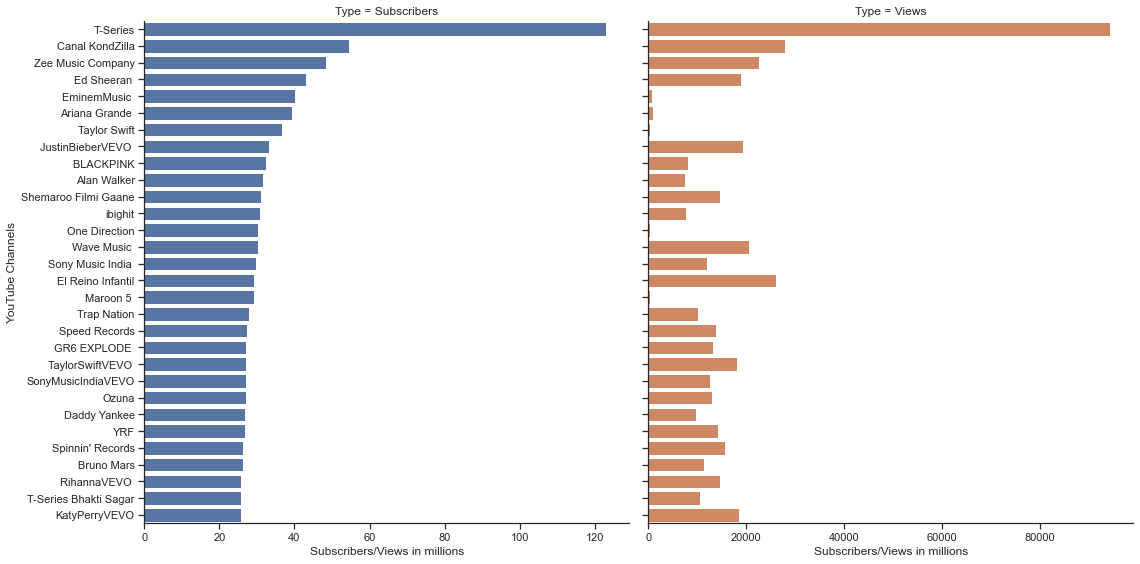

In [27]:
#sharex要不要共用x軸
g = sns.FacetGrid(data, col='Type', hue='Type', sharex=False, height=8)
#order是排列的順序
#我們取unique值當順序，因為每個值重複兩次
channel= data['YouTube Channels'].unique()
#channel=sorted(data['YouTube Channels'].unique().tolist())
g.map(sns.barplot, 'Subscribers/Views in millions', 'YouTube Channels',order=channel)


## <span style="color:red ">讓我們聊聊的一些特別的圖吧!!

## <span style="color:red ">Bar Plots
----
### [什麼是Error Bar?](https://www.medsci.cn/article/show_article.do?id=c0c7180e4222)

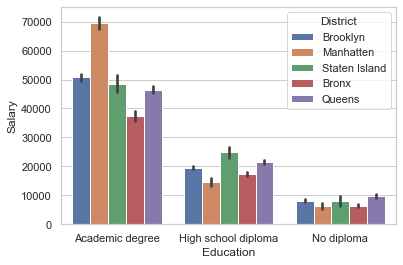

In [28]:
import pandas as pd
import seaborn as sns
data = pd.read_csv("salary.csv")
sns.set(style="whitegrid")
sns.barplot(data=data,x="Education", y="Salary", hue="District")
#每一條bar顯示的就是那個群組的mean
#你有注意到那個小尾巴嗎?那個就是那個群組的std
#誤差棒(error bar)通常是使用在條形圖用來表示整組資料的離散程度 。
#離散程度則是表示每一筆資料與平均值的集中程度，誤差棒愈短表示資料愈集中。

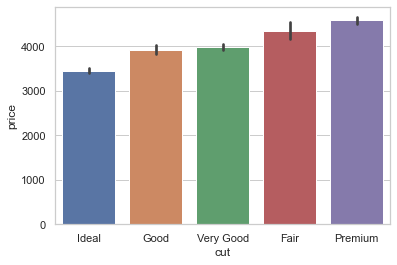

In [29]:
from numpy import median, mean
diamonds= sns.load_dataset('diamonds')

#你可以決定顯示的順序
#你可以決定要用median還是mean做估算
ax = sns.barplot(data=diamonds, x="cut", y="price", estimator=mean,
                 order=['Ideal','Good','Very Good','Fair','Premium'])

### <span style="color:red "><小測驗>資料夾裡面有一份movie_scores.csv的檔案
    有五部電影，每一部電影有兩個成績，可不可以麻煩你幫我畫個Bar chart同時秀出每部電影的兩個成績，比較一下。
------
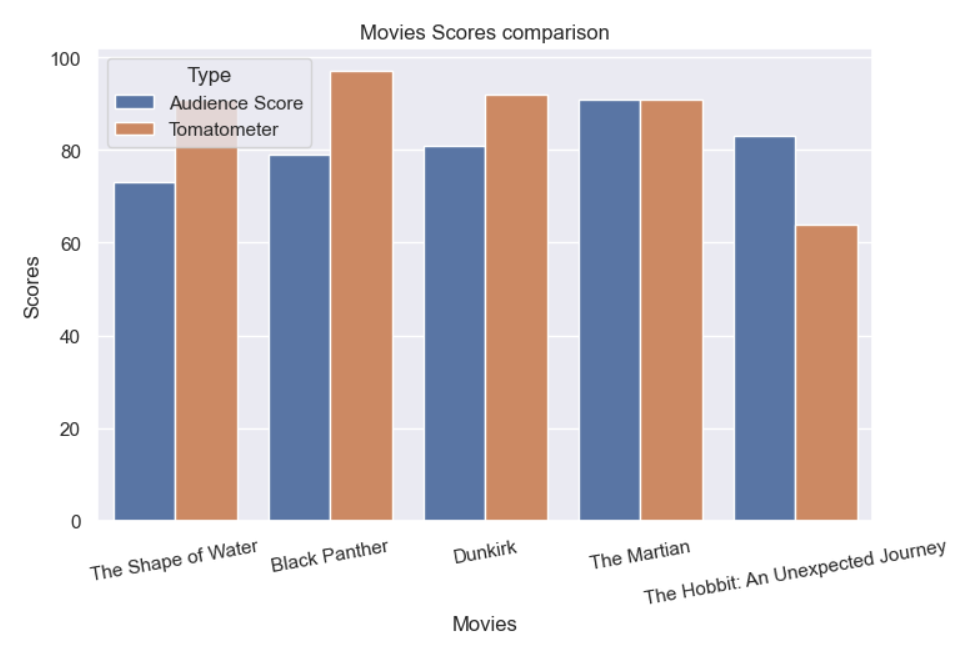

### <span style="color:red "><答案>

In [30]:
import pandas as pd
mydata = pd.read_csv("movie_scores.csv", index_col=0)
mydata

,MovieTitle,Tomatometer,AudienceScore
0,The Shape of Water,91,73
1,Black Panther,97,79
2,Dunkirk,92,81
3,The Martian,91,91
4,The Hobbit: An Unexpected Journey,64,83


In [31]:
#把資料整理成我們需要的格式
movie_scores = pd.DataFrame({"Movie Title": list(mydata["MovieTitle"]) * 2,
                             "Score": list(mydata["AudienceScore"]) + list(mydata["Tomatometer"]),
                             "Type": ["Audience Score"] * len(mydata["AudienceScore"]) + ["Tomatometer"] * len(mydata["Tomatometer"])})
movie_scores

,Movie Title,Score,Type
0,The Shape of Water,73,Audience Score
1,Black Panther,79,Audience Score
2,Dunkirk,81,Audience Score
3,The Martian,91,Audience Score
4,The Hobbit: An Unexpected Journey,83,Audience Score
5,The Shape of Water,91,Tomatometer
6,Black Panther,97,Tomatometer
7,Dunkirk,92,Tomatometer
8,The Martian,91,Tomatometer
9,The Hobbit: An Unexpected Journey,64,Tomatometer


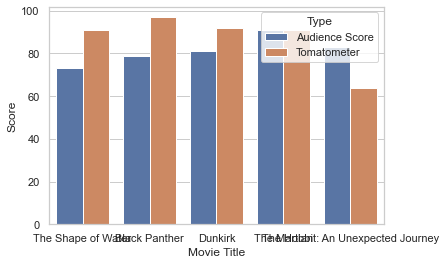

In [32]:
import seaborn as sns

sns.barplot(data=movie_scores,x="Movie Title", y="Score", hue="Type")

<function matplotlib.pyplot.show(*args, **kw)>

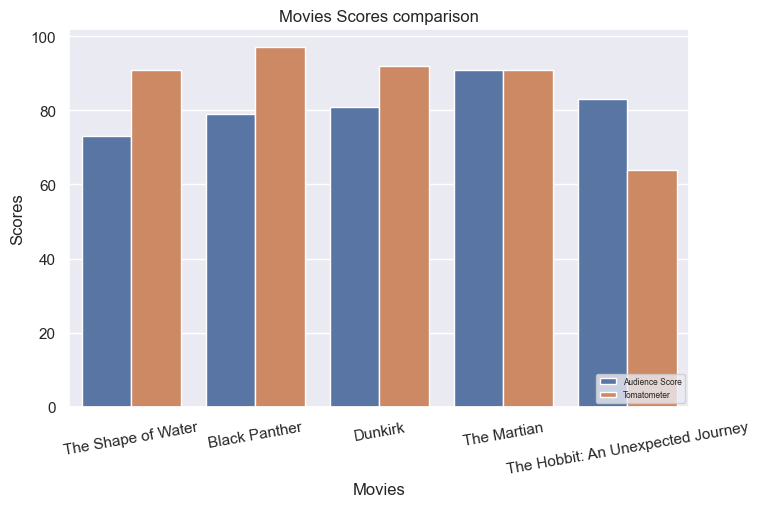

In [36]:
#上面的圖好像有點擠，那我們修改一下
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(8, 5), dpi=100)

# Create bar plot把原本matplotlib的axes替換掉
sns.barplot(x="Movie Title", y="Score", hue="Type", data=movie_scores)

#把相關配件調整一下
plt.xticks(rotation=10)
plt.legend(loc=4, prop={'size': 6})
plt.title("Movies Scores comparison")
plt.xlabel("Movies")
plt.ylabel("Scores")
# Show plot
plt.show

#你有注意到沒有小尾巴嗎?
#因為只有一個成績，怎麼會有error

## <span style="color:red ">Histograms-直方圖

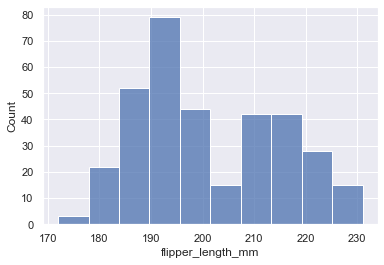

In [37]:
import seaborn as sns
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm")

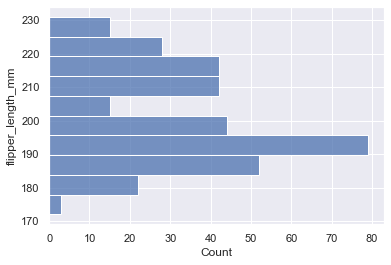

In [38]:
sns.histplot(data=penguins, y="flipper_length_mm")

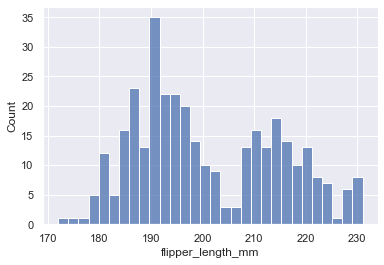

In [39]:
#hist有一個很重要的變數 bins，它會把[最小值,最大值]之間，均分成這些組數的範圍
sns.histplot(data=penguins, x="flipper_length_mm", bins=30)

## <span style="color:red ">小提琴圖-Violin Plots

In [ ]:
import pandas as pd
import seaborn as sns
data = pd.read_csv("salary.csv")
sns.set(style="whitegrid")
#split資料各畫一半
#cut sets to 0 to limit the violin range within the range of the observed data
sns.violinplot(x='Education', y='Salary', hue='Gender', data=data, split=True, cut=0)

### <span style="color:red "><小測驗>資料夾裡面有一份iq_scores.csv的檔案
    請幫忙畫出下面這張圖
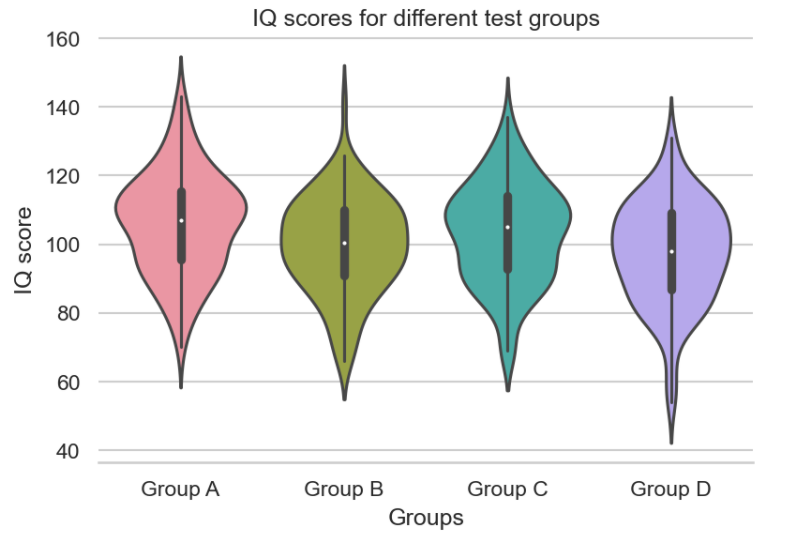

### <span style="color:red "><答案>

In [ ]:
mydata = pd.read_csv("iq_scores.csv")
group_a = mydata[mydata.columns[0]].tolist()
group_b = mydata[mydata.columns[1]].tolist()
group_c = mydata[mydata.columns[2]].tolist()
group_d = mydata[mydata.columns[3]].tolist()
data = pd.DataFrame({'Groups': ['Group A'] * len(group_a) + ['Group B'] * len(group_b) + ['Group C'] * len(group_c) + ['Group D'] * len(group_d),
                     'IQ score': group_a + group_b + group_c + group_d})
data

In [ ]:
# Create figure
plt.figure(dpi=150)
# Set style
sns.set_style('whitegrid')
# Create boxplot
sns.violinplot(x='Groups', y='IQ score', data=data)
# Despine決定框線的顯示
sns.despine(left=True, right=True, top=True)
# Add title
plt.title('IQ scores for different test groups')
# Show plot
plt.show()

## <span style="color:red ">回歸圖-Regression Plots

In [ ]:
import numpy as np
import seaborn as sns
x = np.arange(100)
# normal distribution with mean 0 and a standard deviation of 5
y = x + np.random.normal(0, 5, size=100)
sns.regplot(x=x, y=y)

## <span style="color:red ">其實要把Matplotlib轉成Seaborn，非常簡單!

In [ ]:
#原版Matplotlib的圖
import matplotlib.pyplot as plt
plt.figure()
x1 = [10, 20, 5, 40, 8]
x2 = [30, 43, 9, 7, 20]
plt.plot(x1, label='Group A')
plt.plot(x2, label='Group B')
plt.legend()
plt.show()

## <span style="color:red ">加一個sns.set()-還原成Seaborn初始風格

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure()
x1 = [10, 20, 5, 40, 8]
x2 = [30, 43, 9, 7, 20]
plt.plot(x1, label='Group A')
plt.plot(x2, label='Group B')
plt.legend()
plt.show()

## <span style="color:red ">調整風格設計

## <span style="color:red ">調整整個plot的風格
### seaborn.set_style(style, [rc])
    style:可以是一個dictionary 或是 下面參數的其中一個[darkgrid, whitegrid, dark, white, or ticks]  
    rc (選擇性):如果你有要對預設的參數進行調整，就用這個

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.figure()
x1 = [10, 20, 5, 40, 8]
x2 = [30, 43, 9, 7, 20]
plt.plot(x1, label='Group A')
plt.plot(x2, label='Group B')
plt.legend()
plt.show()

##  [參考網站](https://matplotlib.org/3.3.3/api/axes_api.html#axis-labels-title-and-legend)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#調整背景底色
sns.set_style("whitegrid",{"axes.facecolor": "#e377c2"})
plt.figure()
x1 = [10, 20, 5, 40, 8]
x2 = [30, 43, 9, 7, 20]
plt.plot(x1, label='Group A')
plt.plot(x2, label='Group B')
plt.legend()
plt.show()

## <span style="color:red ">有時候，我們希望我們的圖是乾淨的，沒用的刻度軸(spines)不用出現...
### sns.despine()就可以幫你把右邊的和上面的拿掉...

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
plt.figure()
x1 = [10, 20, 5, 40, 8]
x2 = [30, 43, 9, 7, 20]
plt.plot(x1, label='Group A')
plt.plot(x2, label='Group B')

sns.despine()
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("white")
plt.figure()
x1 = [10, 20, 5, 40, 8]
x2 = [30, 43, 9, 7, 20]
plt.plot(x1, label='Group A')
plt.plot(x2, label='Group B')
#它其實可以設定
sns.despine(fig=None, ax=None, 
            top=True, right=True, 
            left=True, bottom=False, 
            offset=None, trim=False)

plt.legend()
plt.show()

## <span style="color:red ">控制元件尺寸
### 如果我們可以用同樣的語法畫圖，但是面對不同的情境(context)，我們可以有不同的顯示，該有多好...
    seaborn.set_context(context, [font_scale], [rc])  
    最關鍵的參數:
    context:預設四個情境:paper, notebook, talk, or poster
    

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook")
plt.figure()
x1 = [10, 20, 5, 40, 8]
x2 = [30, 43, 9, 7, 20]
plt.plot(x1, label='Group A')
plt.plot(x2, label='Group B')
plt.legend()
plt.show()

# <span style="color:red ">顏色調整-Color Palettes
    seaborn.color_palette([palette], [n_colors], [desat])
    1. palette (optional): 色盤名稱 或是 None 就會回復你現在的色盤內容。
    2. n_colors (optional):你要幾個顏色，如果數目超過色盤，就會循環。
    3. desat (optional): 對飽和度的調整。
 --------
## 內建六種顏色盤組合:deep, muted, bright, pastel, dark,and colorblind
## [手冊參考連結](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette)
 --------
## [色盤參考連結](https://colors.muz.li/)
 ------
## [參考連結](https://zhuanlan.zhihu.com/p/27471537)

In [ ]:
import seaborn as sns
palette1 = sns.color_palette("deep")
sns.palplot(palette1)

In [ ]:
palette2 = sns.color_palette("bright")
sns.palplot(palette2)

In [ ]:
palette2 = sns.color_palette(['#12492f','#0a2f35','#f56038','#f7a325','#ffca7a'])
sns.palplot(palette2)

## <span style="color:red ">調整顏色用.set_palette
### seaborn.set_palette([palette], [n_colors], [desat])
    1. palette (optional): 色盤名稱 或是 None 就會回復你現在的色盤內容。
    2. n_colors (optional):你要幾個顏色，如果數目超過色盤，就會循環。
    3. desat (optional): 對飽和度的調整。

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook")
#開始設定顏色
palette2 = sns.color_palette(['#f56038','#f7a325','#ffca7a'])
sns.set_palette(palette2)
#畫圖
plt.figure()
x1 = [10, 20, 5, 40, 8]
x2 = [30, 43, 9, 7, 20]
plt.plot(x1, label='Group A')
plt.plot(x2, label='Group B')
plt.legend()
plt.show()

## <span style="color:red ">連續色色盤-Sequential Color Palettes
### 這就是一連串從低值到高值顯示的一段顏色，低值代表亮色，高值代表暗色
----
    
### [參考連結](https://seaborn.pydata.org/generated/seaborn.cubehelix_palette.html)

In [ ]:
#sns內建的cubehelix palettes
sns.cubehelix_palette()

In [ ]:
sns.cubehelix_palette(rot=.1)

## <span style="color:red ">如果你想要的是一個淺色系列的組合或是深色系列的組合
### light_palette() or dark_palette().

In [ ]:
#淺色的系列
custom_palette2 = sns.light_palette("magenta")
sns.palplot(custom_palette2)

In [ ]:
#可以反轉顏色的順序
custom_palette3 = sns.light_palette("magenta", reverse=True)
sns.palplot(custom_palette3)

In [ ]:
#深色的系列
custom_palette3 = sns.dark_palette("magenta")
sns.palplot(custom_palette3)

## <span style="color:red ">前面只能產生一個color palette，如果你需要一個Colormap()的組合...
    as_cmap=True
    as_cmap參數用來更改顯示的顏色範圍，讓它顯示是連續的，不會有顏色斷掉的感覺

In [ ]:
import numpy as np
x = np.arange(25).reshape(5, 5)
ax = sns.heatmap(x, cmap=sns.cubehelix_palette(start=0.3, rot=-0.5, n_colors=16))

In [ ]:
x = np.arange(25).reshape(5, 5)
ax = sns.heatmap(x, cmap=sns.cubehelix_palette(start=0.3, rot=-0.5, n_colors=16,as_cmap=True))

## <span style="color:red ">如果你是著重在看資料兩端的表示，那你要考慮Diverging Color Palettes...

In [ ]:
custom_palette4 = sns.color_palette("coolwarm", 7)
sns.palplot(custom_palette4)

In [ ]:
#丟兩個hues當參數，產生一個客製化的色盤
custom_palette5 = sns.diverging_palette(120, 300, n=7)
sns.palplot(custom_palette5)

## <span style="color:red ">範例

In [ ]:
import pandas as pd
data = pd.read_csv("northern_surface_temperature.csv", index_col=['Year'])
data = data.transpose()
data

## <span style="color:red ">怎麼找到Hue值
-----
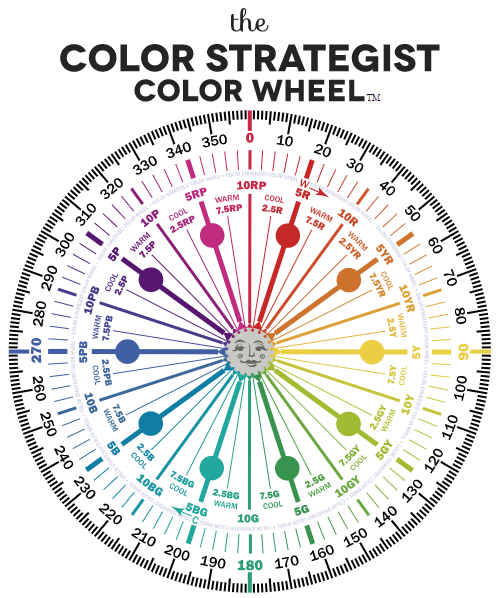

In [ ]:
#Set 飽和度 as s=99
#設定兩個顏色當端點色
heat_colormap = sns.diverging_palette(232, 15, s=99, as_cmap=True)
plt.figure(dpi=100)
#每五年畫一次
#為了確保沒有溫度變化一定是白色，所以設定center=0
sns.heatmap(data.iloc[:, ::5], cmap=heat_colormap, center=0)
plt.title("Temperature Changes from 1880 to 2015 (base period 1951-1980)")
plt.show()

In [ ]:
#飽和度越高越清楚好看
heat_colormap = sns.diverging_palette(232, 15, s=340, as_cmap=True)
plt.figure(dpi=100)
#每五年畫一次
#為了確保沒有溫度變化一定是白色，所以設定center=0
sns.heatmap(data.iloc[:, ::5], cmap=heat_colormap, center=0)
plt.title("Temperature Changes from 1880 to 2015 (base period 1951-1980)")
plt.show()

### <span style="color:red "><小測驗>幫資料夾裡面的flight_details.csv畫一張heatmap
    看看旅客人數的變化
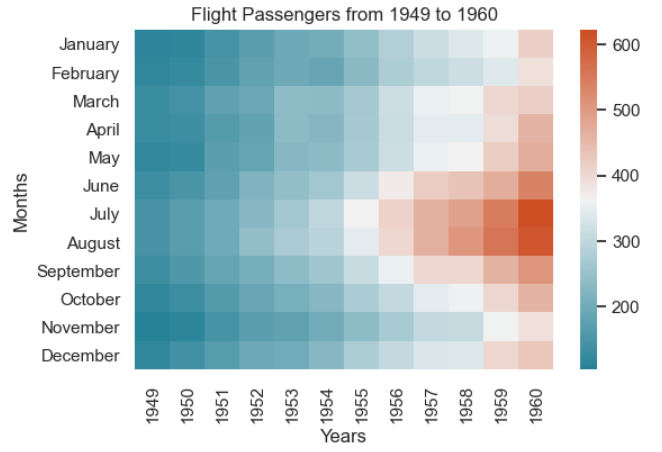

### <span style="color:red "><答案>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
data = pd.read_csv("flight_details.csv")
data

In [ ]:
data = data.pivot("Months", "Years", "Passengers")
data

In [ ]:
data = data.reindex(['January', 'February', 'March', 'April', 'May', 'June',
                     'July', 'August', 'September', 'October', 'November', 'December'])
data

In [ ]:
plt.figure(dpi=100)
sns.heatmap(data, cmap=sns.diverging_palette(218, 20, s=200, as_cmap=True)) 
plt.title("Flight Passengers from 1949 to 1960")
plt.show()